# Simple Translation of a Monopole
This example show how to easy get the expansion of a translated monopole, as well as how the convention of the translation direction come into play.
In this example all fields are exterior fields, i.e. the evaluation points are further away from the origin than the source expansion.

In [1]:
import numpy as np
import shetar
import plotly.graph_objects as go
fig_layout = dict(width=800, height=800, xaxis={'title': 'x/λ'}, yaxis={'title': 'y/λ'})
heatmap_layout = dict(showscale=False, zmid=0, colorscale='Spectral', zsmooth='best')

We will define all coordinates in terms of the wavelength λ.
The origial expansion is that of a monopole at the origin of the coordinate system.
It will be translated to a new position, and the new expansion is at a higher order.

In [2]:
output_order = 50
λ = 1
translation = (5 * λ, 3*λ, 0)

resolution = λ / 20
x_range = (8 * λ, 14 * λ)
y_range = (-3 * λ, 3 * λ)

The monopole expansion can be created from the monopole generator function.
We then find the expansion of the translated monopole by usig the `translate` method.
Note that it is also possible to get expansions of translated monopoles directly from the monopole generator function.

In [3]:
old_expansion = shetar.expansions.monopole(wavenumber=2*np.pi/λ)
new_expansion = old_expansion.translate(order=output_order, position=translation)

Here we create the evaluation mesh for the visualization, and evaluate the base funcitons on the mesh.
We create two meshes, one with the original coordinates and one with coordinates which are translated with the same vector as the expansion.

In [4]:
nx = int((max(x_range) - min(x_range)) / resolution)
ny = int((max(y_range) - min(y_range)) / resolution)
nx += (nx + 1) % 2
ny += (ny + 1) % 2
x = np.linspace(min(x_range), max(x_range), nx)
y = np.linspace(min(y_range), max(y_range), ny)
z = 0
ξ, η, ζ = x + translation[0], y + translation[1], z + translation[2]

old_mesh = np.stack(np.meshgrid(x, y, z, indexing='ij'), axis=-1).squeeze()
new_mesh = np.stack(np.meshgrid(ξ, η, ζ, indexing='ij'), axis=-1).squeeze()

old_bases = new_expansion.bases(old_mesh)
new_bases = new_expansion.bases(new_mesh)

### Original Field
The original source expansion evaluated in the original coordinates.

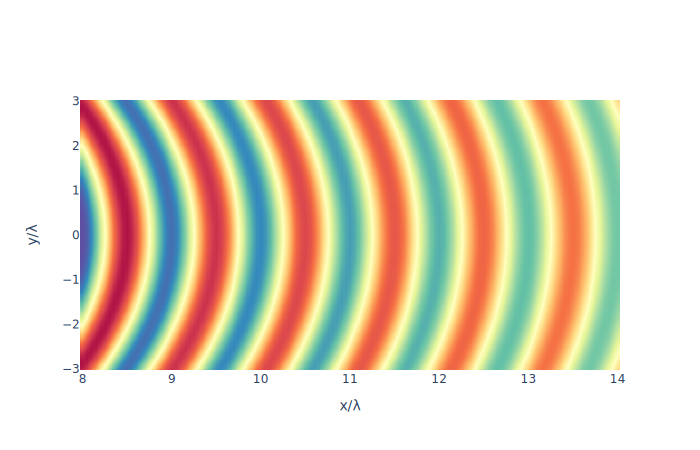

In [5]:
go.Figure([
    go.Heatmap(x=x, y=y, z=np.real(old_expansion.apply(old_bases)).T, **heatmap_layout),
], fig_layout).show('svg')

### Translated field
The new expansion evaluated in the oridinal coordinates. Note how this describes a monopole source at the translation position $\vec t$.
This could also be intrpreted as a reexpansion of the original field with a new origin at $-\vec t$, evaluated at the same coorinate values but in with the new origin.

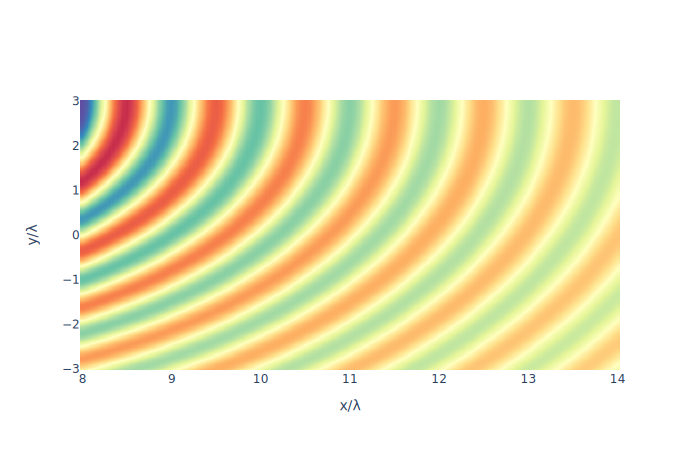

In [6]:
go.Figure([
    go.Heatmap(x=x, y=y, z=np.real(new_expansion.apply(old_bases)).T, **heatmap_layout),
], fig_layout).show('svg')

### Reexpanded field
The new expansion evaluated at the shifted coordinates. Note how the values are the same as the original expansion evaluated at the original coordinates.
This could also be seen as a reexpansion of the original field with a new origin at $-\vec t$, evaluated at the coordinates in the new origin which correspond to the same points in space at the old coordinates.

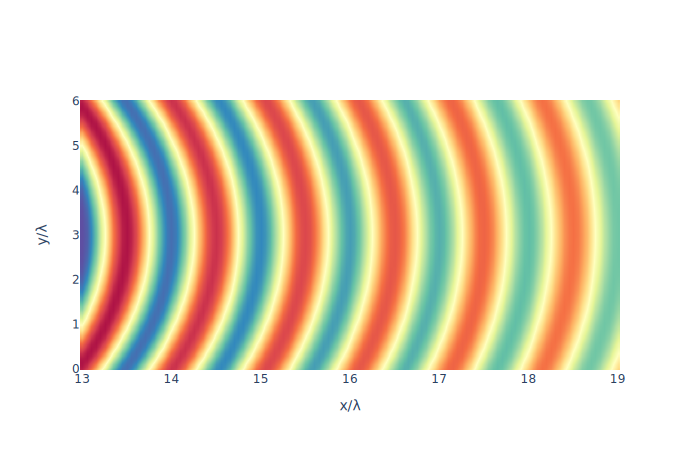

In [7]:
go.Figure([
    go.Heatmap(x=ξ, y=η, z=np.real(new_expansion.apply(new_bases)).T, **heatmap_layout),
], fig_layout).show('svg')

### Reevalulated field
The old expansion evaluated at the shifted coordinates. Note how this still represents a monopole at the origin of the system.

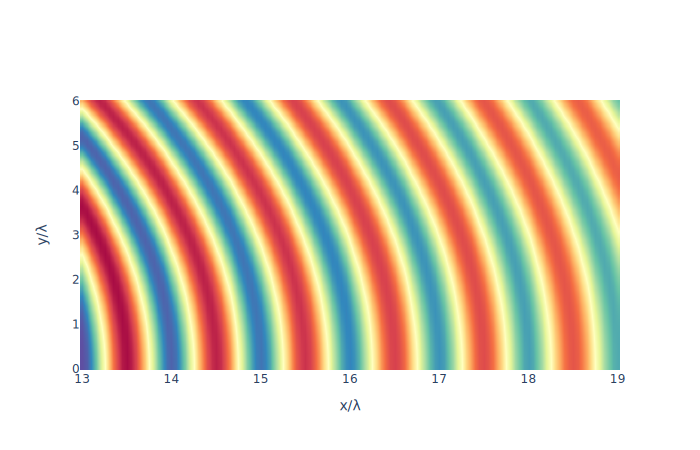

In [8]:
go.Figure([
    go.Heatmap(x=ξ, y=η, z=np.real(old_expansion.apply(new_bases)).T, **heatmap_layout),
], fig_layout).show('svg')